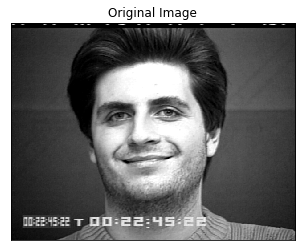

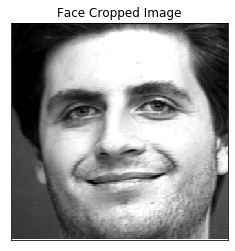

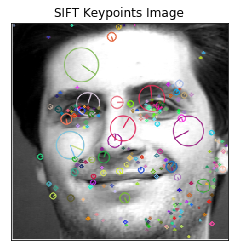

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('test.png',0)
test_image = img.copy()
plt.imshow(test_image,cmap='gray')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.title("Original Image")
plt.show()

haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
faces_rects = haar_cascade_face.detectMultiScale(test_image, scaleFactor = 1.2, minNeighbors = 5);
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
# plt.imshow(test_image)
# plt.show()

# Crop the image
face_cropped = test_image[y:y+h, x:x+w]
plt.imshow(face_cropped,cmap='gray')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.title("Face Cropped Image")
plt.show()

# Resize image to 256 x 256
face_cropped = cv2.resize(face_cropped, (256,256))

# SIFT
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(face_cropped, None)
img=cv2.drawKeypoints(face_cropped,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# print(des.shape)
# print(len(kp))
plt.imshow(img)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.title("SIFT Keypoints Image")
plt.show()
